In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_json('data/brokenmirror-def.json')
df.head()

,Username,Tweet,Reply to,Participants,Hashtags,Date,nLikes,nReplies,nRetweets,Emotion,Polarity,Tokens,Topic
0,C,A partire da oggi scattano alcune novità che m...,None,NaN,[],2020-07-01 19:20:21,2153,955,333,sadness,pos,"[partire, oggi, scattano, alcune, novità, migl...","Lavoro, tasse e imprese"
1,C,Complimenti alla nostra @GDF per la maxi-opera...,None,NaN,[],2020-07-01 13:38:24,3577,317,472,fear,neg,"[complimenti, maxioperazione, porto, salerno, ...","Porti, confini e immigrazione"
2,C,Un bimbo per strada mi ha chiesto se riuscirò ...,None,NaN,[],2020-07-02 17:58:18,7711,2104,974,sadness,pos,"[bimbo, strada, chiesto, riuscirò, “far, funzi...",Solidarietà
3,C,Una icona italiana abbraccia la transizione en...,None,NaN,[fiat500],2020-07-03 18:41:38,3382,422,441,joy,pos,"[icona, italiana, abbraccia, transizione, ener...",UE
4,C,Our hearts and minds today are more than ever ...,None,NaN,[independenceday],2020-07-04 17:58:48,3015,444,316,joy,pos,"[our, hearts, and, minds, today, are, more, th...",Tweet in Inglese


In [4]:
conte = df[df.Username=='C']
salvini = df[df.Username=='S']
meloni = df[df.Username=='M']
letta = df[df.Username=='L']

In [71]:
for d in :
    print(print() , d.nReplies.sum())

172457
983325
445129
162699


In [15]:
tweets = [len(x) for x in [conte, salvini, meloni, letta]]
likes = [x.nLikes.sum() for x in [conte, salvini, meloni, letta]]
replies = [x.nReplies.sum() for x in [conte, salvini, meloni, letta]]
rt = [x.nRetweets.sum() for x in [conte, salvini, meloni, letta]]
comp = pd.DataFrame([tweets, likes, replies, rt], 
                    columns=['Conte', 'Salvini', 'Meloni', 'Letta'],
                   index=['Tweets','Likes', 'Replies', 'Retweets',])

In [16]:
print(comp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &    Conte &  Salvini &   Meloni &   Letta \\
\midrule
Tweets   &      268 &     6654 &     1643 &    1123 \\
Likes    &  1149894 &  5857229 &  2255880 &  881356 \\
Replies  &   172457 &   983325 &   445129 &  162699 \\
Retweets &   140618 &  1012581 &   386947 &   93712 \\
\bottomrule
\end{tabular}



In [24]:
print(comp.transpose().apply(lambda x: x/comp.transpose().Tweets).transpose().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &        Conte &     Salvini &       Meloni &       Letta \\
\midrule
Tweets   &     1.000000 &    1.000000 &     1.000000 &    1.000000 \\
Likes    &  4290.649254 &  880.256838 &  1373.024954 &  784.822796 \\
Replies  &   643.496269 &  147.779531 &   270.924528 &  144.878896 \\
Retweets &   524.694030 &  152.176285 &   235.512477 &   83.447907 \\
\bottomrule
\end{tabular}



In [6]:
from wordcloud import WordCloud

In [98]:
880-784

96

In [57]:
def make_wordcloud(username, filename):
    text = df[df.Username == username].Tokens.to_list()
    text = [tok for lst in text for tok in lst if len(tok) > 3 and '’' not in tok]
    x, y = np.ogrid[:300, :300]

    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    
    wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               contour_width=0, contour_color='steelblue').generate(' '.join(text))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.savefig(f'plots/{filename}')
    plt.show()
    

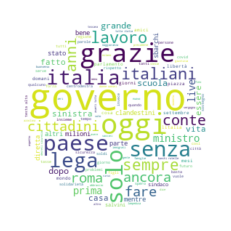

In [58]:
make_wordcloud('S', 'wc-salvini.png')

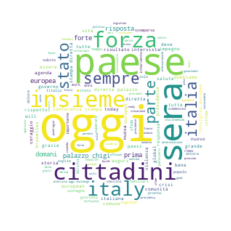

In [59]:
make_wordcloud('C', 'wc-conte.png')

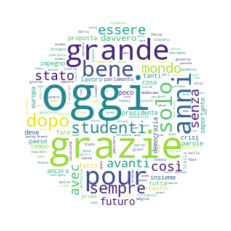

In [60]:
make_wordcloud('L', 'wc-letta.png')

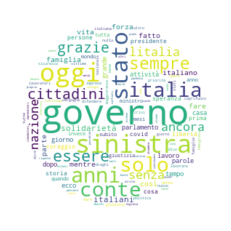

In [61]:
make_wordcloud('M', 'wc-meloni.png')

In [62]:
tot_hashtags = []
for x in df.Hashtags.to_list():
    if len(x) != 0:
        for elem in x:
            tot_hashtags.append(elem)
            
hash_dict = dict()
for ht in tot_hashtags:
    hash_dict[ht] = tot_hashtags.count(ht)
hash_dict = dict(sorted(hash_dict.items(), key=lambda item: -item[1]))

ANNOTATION

In [7]:
conte.Polarity.value_counts(True), salvini.Polarity.value_counts(True),\
meloni.Polarity.value_counts(True), letta.Polarity.value_counts(True)

(pos    0.716418
 neg    0.283582
 Name: Polarity, dtype: float64,
 neg    0.677788
 pos    0.322212
 Name: Polarity, dtype: float64,
 neg    0.780889
 pos    0.219111
 Name: Polarity, dtype: float64,
 pos    0.593054
 neg    0.406946
 Name: Polarity, dtype: float64)

In [8]:
df.Polarity.value_counts(True)

neg    0.652973
pos    0.347027
Name: Polarity, dtype: float64

In [10]:
conte.Emotion.value_counts(True), salvini.Emotion.value_counts(True),\
meloni.Emotion.value_counts(True), letta.Emotion.value_counts(True)

(joy        0.667910
 sadness    0.220149
 fear       0.059701
 anger      0.052239
 Name: Emotion, dtype: float64,
 anger      0.498948
 joy        0.315299
 sadness    0.143673
 fear       0.042080
 Name: Emotion, dtype: float64,
 anger      0.527693
 sadness    0.216068
 joy        0.214851
 fear       0.041388
 Name: Emotion, dtype: float64,
 joy        0.606411
 sadness    0.201247
 anger      0.170080
 fear       0.022262
 Name: Emotion, dtype: float64)

,Username,Tweet,Reply to,Participants,Hashtags,Date,nLikes,nReplies,nRetweets,Emotion,Polarity,Tokens,Topic
0,C,A partire da oggi scattano alcune novità che m...,None,NaN,[],2020-07-01 19:20:21,2153,955,333,sadness,pos,"[partire, oggi, scattano, alcune, novità, migl...","Lavoro, tasse e imprese"
1,C,Complimenti alla nostra @GDF per la maxi-opera...,None,NaN,[],2020-07-01 13:38:24,3577,317,472,fear,neg,"[complimenti, maxioperazione, porto, salerno, ...","Porti, confini e immigrazione"
2,C,Un bimbo per strada mi ha chiesto se riuscirò ...,None,NaN,[],2020-07-02 17:58:18,7711,2104,974,sadness,pos,"[bimbo, strada, chiesto, riuscirò, “far, funzi...",Solidarietà
3,C,Una icona italiana abbraccia la transizione en...,None,NaN,[fiat500],2020-07-03 18:41:38,3382,422,441,joy,pos,"[icona, italiana, abbraccia, transizione, ener...",UE
4,C,Our hearts and minds today are more than ever ...,None,NaN,[independenceday],2020-07-04 17:58:48,3015,444,316,joy,pos,"[our, hearts, and, minds, today, are, more, th...",Tweet in Inglese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,S,𝙀𝙦𝙪𝙖 𝙫𝙖𝙡𝙪𝙩𝙖𝙯𝙞𝙤𝙣𝙚 𝙙𝙚𝙞 𝙢𝙖𝙜𝙞𝙨𝙩𝙧𝙖𝙩𝙞 Con #referend...,None,NaN,[referendumgiustizia],2021-06-30 21:54:58,374,61,73,joy,pos,"[𝙀𝙦𝙪𝙖, 𝙫𝙖𝙡𝙪𝙩𝙖𝙯𝙞𝙤𝙣𝙚, 𝙙𝙚𝙞, 𝙢𝙖𝙜𝙞𝙨𝙩𝙧𝙖𝙩𝙞, rappresen...","Comizi, dirette social, interventi TV"
9684,S,…e 100.000 lavoratori. Meglio un divertimento ...,None,NaN,[],2021-06-30 19:44:44,353,65,44,anger,neg,"[…e, lavoratori, meglio, divertimento, sicuro,...","Lavoro, tasse e imprese"
9685,S,Perché punire ancora i giovani?? Locali per ra...,None,NaN,[],2021-06-30 19:44:44,642,221,89,anger,neg,"[punire, ancora, giovani, locali, ragazzi, dis...","Lavoro, tasse e imprese"
9686,S,Rinvio al 30 settembre di tutte le date della ...,None,NaN,[],2021-06-30 16:40:16,905,162,120,anger,neg,"[rinvio, settembre, tutte, date, rottamazione,...","Lavoro, tasse e imprese"
